## Introduction

Breast cancer is a huge challange. Accurate and early diagnostics can decrease mortality rate. It is crucial to distinguish malignant type of breast cancer (not harmful) from bening (cancerous). A predictive model will be built for diagnosting the type of breast cancer based on morphological characteristics of cells.

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set_context(rc={"figure.figsize": (10,5)})
sns.set(font_scale=2)
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
#Importing data from a csv file to a dataframe 
df = pd.DataFrame.from_csv(r'C:\Users\Igor\Jupyter_Notebook_Projects\Insight\BreastCancer\Data1.csv', index_col=None)

In [4]:
# Check - all is correct
df.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [35]:
# Describe data
df.describe()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE74B89080>]], dtype=object)

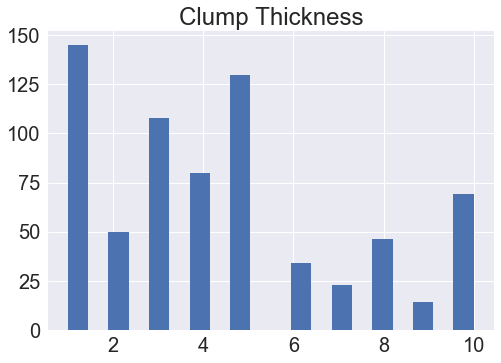

In [48]:
# Some data exploration
df[['Clump Thickness']].hist(bins=20)

In [6]:
# Check Class (diagnosis) values and distribution
# Disbalance is not significant, no need to fix it
df.Class.value_counts()

2    458
4    241
Name: Class, dtype: int64

In [7]:
# Check the columns type
# The Bare Nuclei column is an object type - something is wrong
df.dtypes

ID                              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [8]:
# Check the Bare Nuclei data
# '?' value is the issue
df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [9]:
# Remove the the rows with the '?' values
df1 = df[df['Bare Nuclei'] != '?']

In [10]:
# Check the Class values distribution - has not changed drastically
df1.Class.value_counts()

2    444
4    239
Name: Class, dtype: int64

In [11]:
# Convert all data to int
df2 = df1.astype(int)

In [12]:
# VCheck - all is good
df2.dtypes

ID                             int32
Clump Thickness                int32
Uniformity of Cell Size        int32
Uniformity of Cell Shape       int32
Marginal Adhesion              int32
Single Epithelial Cell Size    int32
Bare Nuclei                    int32
Bland Chromatin                int32
Normal Nucleoli                int32
Mitoses                        int32
Class                          int32
dtype: object

## Prepare data for modeling

In [13]:
# Normalize predictors and labels, such that they contain only values between 0 and max-1

from sklearn.preprocessing import LabelEncoder

var_mod = df2.columns.tolist()
le = LabelEncoder()
for i in var_mod:
    df2[i] = le.fit_transform(df2[i])
# Check the data types
df2.dtypes 

ID                             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [14]:
# Check the data
df2.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,166,4,0,0,0,1,0,2,0,0,0
1,169,4,3,3,4,6,9,2,1,0,0
2,170,2,0,0,0,1,1,2,0,0,0
3,171,5,7,7,0,2,3,2,6,0,0
4,173,3,0,0,2,1,0,2,0,0,0


In [15]:
# all data now in 0-max format
df2.describe()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,313.585652,3.442167,2.150805,2.215227,1.830161,2.234261,2.544656,2.445095,1.869693,0.582723,0.349927
std,181.632124,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.636316,0.477296
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,157.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,313.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,472.500000,5.000000,4.000000,4.000000,3.000000,3.000000,5.000000,4.000000,3.000000,0.000000,1.000000
max,629.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,8.000000,1.000000


In [16]:
# Creating a dataframe with features (predictors) to be analyzed
df_ml = df2.drop('ID ', 1)
df_X = df_ml.drop('Class', 1)

In [17]:
#Preparing arrays for ML analysis
X = df_X.values
Y = df_ml['Class'].values

Random Forest Classificator algorithm will be used for modeling since it can deal with inbalanced classed and produce relative importances of the predictors

In [18]:
# Generate a random forests model and measure its performance using cross-validation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, class_weight = 'balanced')

print('Cross-validation score')
r4 = []
kfold = KFold(n_splits=5)
for train_indices, test_indices in kfold.split(X):
    rf.fit(X[train_indices], Y[train_indices])
    r2 = cross_val_score(rf, X[test_indices], Y[test_indices], scoring = 'accuracy')
    r3 = np.mean(r2)
    r4.append(r3)
    print(r3)
average_accuracy = sum(r4)/5
print("Average accuracy : %s" % "{0:.3%}".format(average_accuracy))
print("Standard deviation : %s" % "{0:.3%}".format(np.std(r4)))

Cross-validation score
0.971000788022
0.948631239936
0.963593380615
0.971014492754
0.977931488801
Average accuracy : 96.643%
Standard deviation : 0.999%


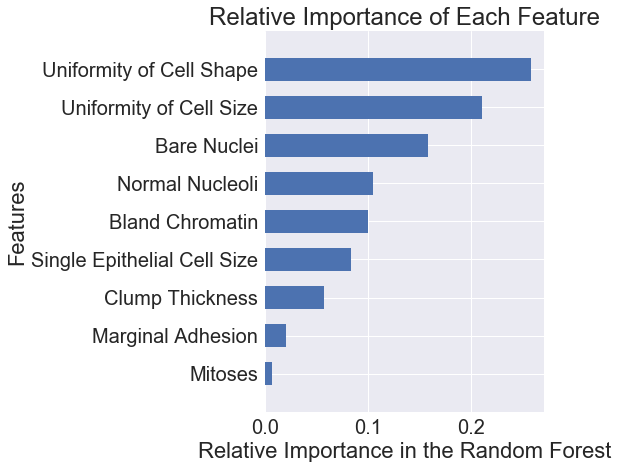

In [19]:
# Plotting ranked features
fimp = rf.feature_importances_
name_list = df_X.columns
fimp, name_list = zip(*sorted(zip(fimp, name_list)))
plt.figure(figsize = (5,7))
plt.barh(range(len(name_list)),fimp,align='center', height = 0.6)
plt.yticks(range(len(name_list)),name_list)
plt.ylim((-1, len(name_list)))
#plt.xlim((0, (int(max(fimp))+0.95)))
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative Importance of Each Feature')
plt.show()

Conclusion: The model predicts the type of breast cancer with very high accuracy of 96.6%